# Global Energy

## Introduction

In this project we will address a common problem: **missing data**. We will start from a global energy consumption dataset containing a variable with several missing values and we will build a **linear regression** model that will exploit the known values (of another variable) to predict the null ones.

![](https://raw.githubusercontent.com/boolean-data-analytics/img/main/on-demand/DAREG-global-energy.jpeg)

**[linear regression](https://realpython.com/linear-regression-in-python/)** is one of the best known statistical learning techniques and is therefore the perfect springboard to enter the vast and exciting world of machine learning.

The most common goal in statistics and, more generally, in data science, is to **predict**, i.e. use the `data` available to build a `model` (which is a simplified representation of the reality) that allows us to make a `prediction` about a future or not yet observed event.

> *It may seem like an abstract concept, but it's what we do every day before leaving home:*
1. let's look out the window and see if the sky is overcast > `data`
2. we compare the observed sky with our past experience > `model`
3. let's evaluate whether it is likely to rain > `forecast`

> in general the most common goal of data science is to predict something from data, creating a model (simplification of reality) and a future or missing value.

## Dataset

First we load all the **libraries** that we will need in the analysis.

In [2]:
#--------------------
# Basic libraries for data analysis
import numpy as np
import pandas as pd

#--------------------
# Data Visualization
import seaborn as sns

sns.set_theme()
sns.set(rc={'figure.figsize':(11,7)})

from matplotlib import pyplot as plt

#--------------------
# One of the most popular data science libraries
from sklearn.linear_model import LinearRegression


We will work with a dataset containing annual data (from 2000 to 2012) related to socio-economic indicators (such as GDP, CO2 emissions, energy consumption, life expectancy, etc.) from over 200 countries around the world.

Let's load the dataset and take a first look at it:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/boolean-data-analytics/data/main/World%20Indicators%20S.csv')
df

,Country/Region,Region,Year,Population Total,GDP,CO2 Emissions,Energy Usage,Life Expectancy,Infant Mortality Rate
0,Algeria,Africa,01/12/2000,31719449,5.479006e+10,87931.0,26998.0,69.0,0.034
1,Angola,Africa,01/12/2000,13924930,9.129595e+09,9542.0,7499.0,45.5,0.128
2,Benin,Africa,01/12/2000,6949366,2.359122e+09,1617.0,1983.0,55.0,0.090
3,Botswana,Africa,01/12/2000,1755375,5.788312e+09,4276.0,1836.0,50.5,0.054
4,Burkina Faso,Africa,01/12/2000,11607944,2.610959e+09,1041.0,NaN,50.5,0.096
...,...,...,...,...,...,...,...,...,...
2686,Belize,The Americas,01/12/2012,324060,1.572500e+09,NaN,NaN,74.0,0.015
2687,Haiti,The Americas,01/12/2012,10173775,7.890217e+09,NaN,NaN,63.0,0.056
2688,Bolivia,The Americas,01/12/2012,10496285,2.703511e+10,NaN,NaN,67.0,0.032
2689,Honduras,The Americas,01/12/2012,7935846,1.856426e+10,NaN,NaN,73.5,0.020


GDP = Gross domestic product

## Preliminary analysis

We use the `.info()` method to explore the variables included in the DataFrame and any missing values:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2691 entries, 0 to 2690
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country/Region         2691 non-null   object 
 1   Region                 2691 non-null   object 
 2   Year                   2691 non-null   object 
 3   Population Total       2691 non-null   int64  
 4   GDP                    2494 non-null   float64
 5   CO2 Emissions          2125 non-null   float64
 6   Energy Usage           1785 non-null   float64
 7   Life Expectancy        2555 non-null   float64
 8   Infant Mortality Rate  2444 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 189.3+ KB


The first three variables are strings (object), the fourth is composed of integer values (int) and the other five are composed of real values (float).

We note that most of the numeric variables (except for `Population Total`), contain missing values, in particular `Energy Usage` is **the variable with the highest number of null values** (1785 out of 2691, about 66%) and therefore lends itself as an excellent candidate for our linear regression exercise.

## Missing values

When we encounter missing values, there are actually three things we can do to address the problem:

* leave the missing value where it is
* delete the remark (i.e. the whole line) - Only when multiple records (information) on multiple variables are missing.
* **insert another value in place of the null one**

This last option can be addressed by following different paths:

* enter a predetermined value (for example 0)
* enter a global average value (for example the average of the variable)
* enter the average value of the last "n" observations (in case there is a time link between the observations of the variable)
* interpolation of the data
* **regression**

We will focus on the latter technique, which is certainly the most complex but also the most interesting and is the basis of statistical learning algorithms (machine learning).

## Relationship between variables

From what we said above, our goal will be to predict the missing values of the variable `Energy Usage` using the other data available to us.

>✨ In order to use one variable to predict another, there must be a strong relationship (**correlation**) between these two.

One way to graphically verify the existence of a relationship between two variables is with a scatterplot (or **scatterplot**); let's see for example the relationship between `Energy Usage` ([measured](https://databank.worldbank.org/metadataglossary/world-development-indicators/series/EG.USE.PCAP.KG.OE) in thousands of tons) and `CO2 Emissions` ([measured](https://databank.worldbank.org/metadataglossary/millennium-development-goals/series/EN.ATM.CO2E.KT) in kilotons):

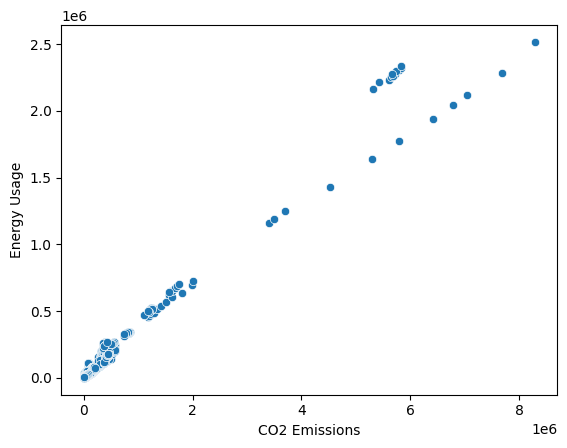

In [8]:
sns.scatterplot(data=df, x='CO2 Emissions', y='Energy Usage')
plt.show() # delete the string: <Axes: xlabel='CO2 Emissions', ylabel='Energy Usage'>

From the scatterplot we see that there is a **strong direct linear relationship** between the two variables, in fact we note that as one increases, the other also increases proportionally. We could therefore think of **building a model** (actually an equation) which, given one variable, is able to predict the second.

## Distribution of null values

Let's look at the distribution of null values between the two variables, using the `.isna()` and `.notna()` methods:

In [10]:
df['CO2 Emissions'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2686     True
2687     True
2688     True
2689     True
2690     True
Name: CO2 Emissions, Length: 2691, dtype: bool

`isna()` returns a boolean vector True False

Slicing is now applied to obtain the cases where the vector has only True values:

In [12]:
df[df['CO2 Emissions'].isna()].shape[0]

566

There are 566 missing values in the 'CO2 Emissions' column

> `.shape()` it is used to select the number of rows.

We want to check where both the variables `CO2 Emissions `and  `Energy Usage`  are null, we use the boolean operator AND (&):
> `df[ (1st condiction) & (2nd condiction) ]`

In [13]:
df[df['CO2 Emissions'].isna() & df['Energy Usage'].isna()].shape[0]

376

There are 376 observations in which both variables have null values.

Now it is good to visualize all the combinations between the two variables relative to the null values:

* Both have null values `df['CO2 Emissions'].isna() & df['Energy Usage'].isna()`
* Only 'CO2 Emissions' has null values `df['CO2 Emissions'].notna()`
* Only 'Energy Usage' has null values `df['Energy Usage'].notna()`
* Both have no null values `df['CO2 Emissions'].notna() & df['Energy Usage'].notna()`

In [16]:
print(f"Both have null values: {df[df['CO2 Emissions'].isna() & df['Energy Usage'].isna()].shape[0]}")
print(f"Only 'CO2 Emissions' has null values: {df[df['CO2 Emissions'].isna() & df['Energy Usage'].notna()].shape[0]}")
print(f"Only 'Energy Usage' has null values: {df[df['CO2 Emissions'].notna() & df['Energy Usage'].isna()].shape[0]}")
print(f"Both have no null values: {df[df['CO2 Emissions'].notna() & df['Energy Usage'].notna()].shape[0]}")

Both have null values: 376
Only 'CO2 Emissions' has null values: 190
Only 'Energy Usage' has null values: 530
Both have no null values: 1595


> ⭐🚀 Experiment

> Could think of elaborating a for loop:

In [21]:
check_col = ['CO2 Emissions', 'Energy Usage']

for column1 in check_col:
    for column2 in check_col:
        null_both = df[df[column1].isna() & df[column2].isna()].shape[0]
        null_column1 = df[df[column1].isna() & df[column2].notna()].shape[0]
        null_column2 = df[df[column1].notna() & df[column2].isna()].shape[0]
        not_null_both = df[df[column1].notna() & df[column2].notna()].shape[0]

        color1 = '\033[31m' if column1 == 'CO2 Emissions' else '\033[34m'  # red o blue
        color2 = '\033[31m' if column2 == 'CO2 Emissions' else '\033[34m'  # red o blue

        print(color1 + f"{column1}" + '\033[0m' + " and " + color2 + f"{column2}:" + '\033[0m')
        print(f"  Both null: {null_both}")
        print(f"  Only {column1} null: {null_column1}")
        print(f"  Only {column2} null: {null_column2}")
        print(f"  Both not null: {not_null_both}")


CO2 Emissions and CO2 Emissions:
  Both null: 566
  Only CO2 Emissions null: 0
  Only CO2 Emissions null: 0
  Both not null: 2125
CO2 Emissions and Energy Usage:
  Both null: 376
  Only CO2 Emissions null: 190
  Only Energy Usage null: 530
  Both not null: 1595
Energy Usage and CO2 Emissions:
  Both null: 376
  Only Energy Usage null: 530
  Only CO2 Emissions null: 190
  Both not null: 1595
Energy Usage and Energy Usage:
  Both null: 906
  Only Energy Usage null: 0
  Only Energy Usage null: 0
  Both not null: 1785
